In [2]:
# !{sys.executable} -m pip install spectral
# !{sys.executable} -m pip install wxpython
from spectral import *
import spectral.io.envi as envi
import numpy as np
from PIL import Image
# import matplotlib
hdr = envi.open('V:\\Data\\St_Supery\\IOP3_July2021\\Tripod\\tripod_canopy_2020_210727_145248\\canopy_lb_2020_5ms\\canopy_lb_2020_5ms_000000\\canopy_lb_2020_5ms_000000.hdr')
# bandData = envi.open('V:\\Data\\St_Supery\\IOP3_July2021\\Tripod\\tripod_canopy_2020_210727_145248\\canopy_lb_2020_5ms\\canopy_lb_2020_5ms_000000\\canopy_lb_2020_5ms_000000.dat')



OSError: [Errno 22] Invalid argument

In [18]:
hdr

	Data Source:   'V:\Data\St_Supery\IOP3_July2021\Tripod\tripod_canopy_2020_210727_145248\canopy_lb_2020_5ms\canopy_lb_2020_5ms_000000\canopy_lb_2020_5ms_000000.dat'
	# Rows:           1024
	# Samples:        1024
	# Bands:           240
	Interleave:        BSQ
	Quantization:  16 bits
	Data format:    uint16

In [19]:
# This loads the data contained as a hypercube (1024,1024,240) -> (PixelRow,PixelColumn,wavelength)
arr = hdr.load()
arr.shape

In [53]:
# List of all 240 wavelengths
wv = arr.bands.centers
len(wv)


240

wavelength:  667.4


ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 41333.0]
    G: [0.0, 41333.0]
    B: [0.0, 41333.0]

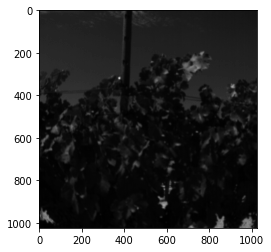

In [55]:
# Access the 100th band
img = arr[:,:,100]
print("wavelength: ", str(wv[100]))
imshow(img)

In [66]:
# Confirm Lossless by pixel comparison
# Can be more thorough if necessary for validation
npImg = np.array(img)
for i in range(3):
    print("Type :" + str(type(img))+ "\n Value: " + str(img[1,i]))
    print("type converted: " + str(type(npImg)) + "\n Value: " + str(npImg[1,i]))


Type :<class 'spectral.image.ImageArray'>
 Value: [10356.]
type converted: <class 'numpy.ndarray'>
 Value: [10356.]
Type :<class 'spectral.image.ImageArray'>
 Value: [10579.]
type converted: <class 'numpy.ndarray'>
 Value: [10579.]
Type :<class 'spectral.image.ImageArray'>
 Value: [10542.]
type converted: <class 'numpy.ndarray'>
 Value: [10542.]


In [71]:
hypercube = np.array(arr)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 65535.0]
    G: [0.0, 65535.0]
    B: [0.0, 65535.0]

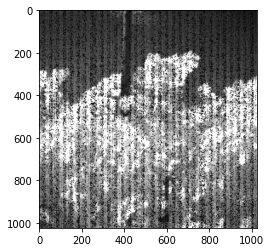

In [72]:
imshow(hypercube[:,:,2])

ImageView object:
  Display bands       :  (45, 20, 10)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 36119.0]
    G: [0.0, 36317.0]
    B: [0.0, 29664.0]

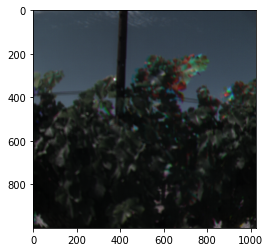

In [10]:
# an rgb used with indices of wavelengths, note needed after Numpy conversion
imshow(arr, (39,39,9))


In [75]:
for band in range(len(wv)):
    img = Image.fromarray(hypercube[:,:,band])
    img.save('V:\Data\St_Supery\Tripod_Tiff_Work\TestTiff_tripod_canopy_2020_210727_145248\\tripod_canopy_2020_210727_145248_'+str(wv[band])+'.tif')

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 41333.0]
    G: [0.0, 41333.0]
    B: [0.0, 41333.0]

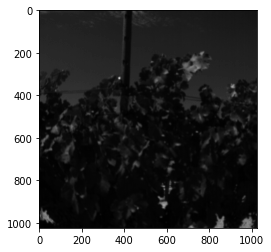

In [78]:
reloaded = np.array(Image.open('V:\Data\St_Supery\Tripod_Tiff_Work\TestTiff_tripod_canopy_2020_210727_145248\\tripod_canopy_2020_210727_145248_667.4.tif'))     
imshow(reloaded)

In [ ]:
#!{sys.executable} -m pip install wxpython
# !{sys.executable} -m pip install pyopengl
# from wx import glcanvas

# view_cube(arr,bands=[60,39,9])